In [34]:
# Import required libraries and dependencies
import os
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the environment variable to avoid memory leak
os.environ["OMP_NUM_THREADS"] = "1"


In [35]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [36]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [37]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [38]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [39]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns)

# Copy the crypto names from the original DataFrame
df_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_scaled = df_scaled.set_index('coin_id')

# Display the scaled DataFrame
df_scaled.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [40]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [68]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

In [42]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


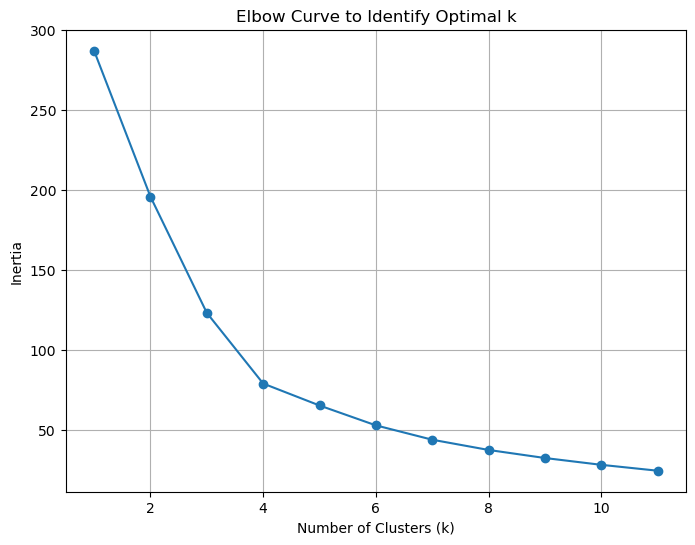

In [43]:
# Plot a line chart with all the inertia values computed with different values of k
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve to Identify Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [44]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)


In [45]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)


KMeans(n_clusters=4, n_init=10, random_state=0)

In [46]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(df_scaled)

# Print the resulting array of cluster values
print(clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [47]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()


In [48]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['cluster'] = clusters

# Display the copy of the scaled DataFrame
df_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [49]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on K-Means'
)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [50]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)


In [51]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal components.
# View the scaled PCA data

pca_data = pca.fit_transform(df_scaled)


df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_scaled.index)


df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [52]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

In [53]:
total_explained_variance = explained_variance.sum()
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.89503166

In [54]:
# Create a new DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_pca = df_pca.set_index('coin_id')

# Display the scaled PCA DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [55]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))


In [56]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_pca.fit(df_pca)
    inertia_values_pca.append(kmeans_pca.inertia_)


In [57]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k': k_values_pca,
    'inertia': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747


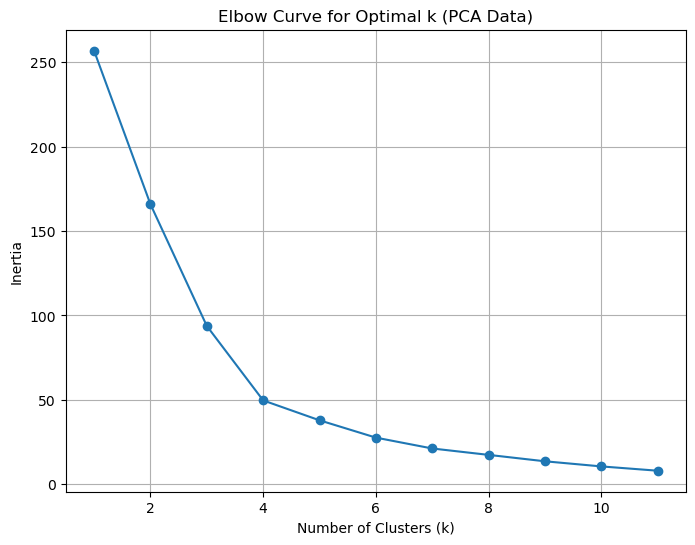

In [58]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  The best value for k is 4 based on the Elbow Curve for the PCA-transformed data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for k is 4 for both the PCA-transformed data and the original scaled data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [59]:
# Initialise the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)


In [60]:
# Fit the K-Means model using the scaled PCA DataFrame
kmeans_pca.fit(df_pca)


KMeans(n_clusters=4, n_init=10, random_state=0)

In [61]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values
print(pca_clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [62]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = pca_clusters

# Ensure the DataFrame is correct
df_pca_copy.head()



,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [63]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Create a scatter plot using hvPlot

df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA Data)'
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [64]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

# Composite plot to contrast the Elbow curves

# Plot the Elbow curve for the original scaled data
elbow_plot_original = df_elbow.hvplot.line(x='k', y='inertia', label='Original Data Elbow Curve', line_width=2)

# Plot the Elbow curve for the PCA-transformed data
elbow_plot_pca = df_elbow_pca.hvplot.line(x='k', y='inertia', label='PCA Data Elbow Curve', line_width=2)

# Create a composite plot to contrast both Elbow curves
composite_elbow_plot = elbow_plot_original * elbow_plot_pca

# Display the composite plot
composite_elbow_plot


:Overlay
   .Curve.Original_Data_Elbow_Curve :Curve   [k]   (inertia)
   .Curve.PCA_Data_Elbow_Curve      :Curve   [k]   (inertia)

In [65]:
# Composite plot to contrast the clusters

# Scatter plot for the original scaled data
cluster_plot_original = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='cluster', 
    hover_cols=['coin_id'], 
    title='Original Data Clusters'
)

# Scatter plot for the PCA-transformed data
cluster_plot_pca = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='cluster', 
    hover_cols=['coin_id'], 
    title='PCA Data Clusters'
)

# Create a composite plot to contrast both cluster plots
composite_cluster_plot = cluster_plot_original + cluster_plot_pca

# Display the composite plot
composite_cluster_plot


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features via PCA simplifies the clustering process, making cluster separation clearer and more efficient. However, it may lose some minor details from the original dataset, though the main groupings are still preserved.